In [13]:
import pandas as pd

df = pd.read_csv("/content/MultiVarLR.csv",header=None)
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,[-1]].to_numpy()
data = np.concatenate((np.ones(y.shape),X),axis=1)
data.shape

(25, 4)

In [7]:
class Linear_Regression:

    def cost(target_label,predicted_label,m,batch_size,batch_number):
        error_vector = predicted_label.T - target_label[batch_number:batch_number+batch_size]
        cost = (np.linalg.norm(error_vector) ** 2) / (batch_size*2)
        return cost,error_vector
    def gradient_1(error_vector,data,m,batch_size,batch_number):
        D_theta = (error_vector.T@data[batch_number:batch_number+batch_size]) / batch_size
        return D_theta.T
    def gradient_2(data, target_label):
  
        m = len(target_label)
        D_theta_2 = (data.T@data)/m
        return D_theta_2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
class SGD:

    def __init__(self,data,target_label,function,first_derivative,batch_size,
    learning_rate = 0.0005,max_iterations = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.function = function
        self.first_derivative = first_derivative
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.costs = []
    def Init_SGD(self,data,target_label):

        m = self.data.shape[0]
        n = self.data.shape[1] + 1
        connected_array = np.concatenate((np.ones((m,1)),self.data,self.target_label), axis = 1)
        np.random.shuffle(connected_array)
        data = connected_array[:, :-1]
        target_label = connected_array[:, [-1]]
        return data,target_label,m,n
    
    def optimize(self):

        self.data,self.target_label,m,n = self.Init_SGD(self.data,self.target_label)
        c = ceil(m / self.batch_size)
        theta = np.zeros((n,1))
        for i in range(self.max_iterations):
            for j in range(0,m,self.batch_size):
                predicted_label = self.data[j:j+self.batch_size]@theta
                predicted_label = predicted_label.T
                cost,error_vector = self.function(self.target_label, predicted_label,m,self.batch_size,j)
                self.costs.append(cost)
                D_theta = self.first_derivative(error_vector,self.data,m,self.batch_size,j)

                theta = theta - (self.learning_rate * D_theta)
            if(np.linalg.norm(D_theta,2) < self.stop_criteria):break
            if(i > 0):
                if (abs(self.costs[i * c] - self.costs[(i-1) * c]) < self.convergance_criteria):break
        return theta
    
    def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)

In [14]:
from sklearn.metrics import r2_score
opt = SGD(X,y,Linear_Regression.cost,Linear_Regression.gradient_1,X.shape[0],0.0001)
theta = opt.optimize()
r2_score(y,data@theta)

0.9857200176274099

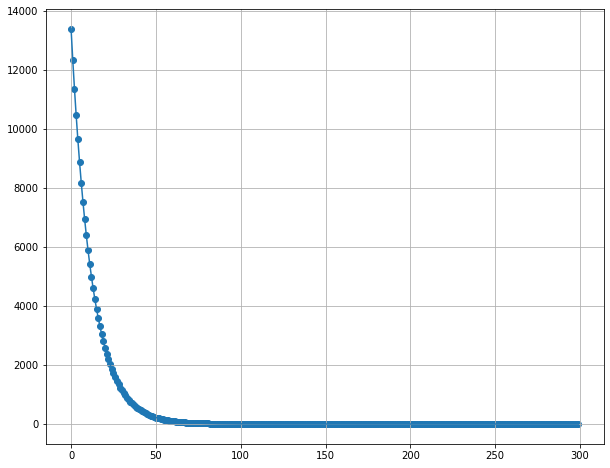

In [11]:
opt.loss_vs_epochs()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
class SGD_with_Momentum:

    def __init__(self,data,target_label,function,first_derivative,batch_size,
    learning_rate = 0.0005,gamma = 0.9,max_iterations = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.function = function
        self.first_derivative = first_derivative
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.gamma = gamma
        self.costs = []
    def Init_SGD(self,data,target_label):

        m = self.data.shape[0]
        n = self.data.shape[1] + 1
        connected_array = np.concatenate((np.ones((m,1)),self.data,self.target_label), axis = 1)
        np.random.shuffle(connected_array)
        data = connected_array[:, :-1]
        target_label = connected_array[:, [-1]]
        return data,target_label,m,n
    
    def optimize(self):

        self.data,self.target_label,m,n = self.Init_SGD(self.data,self.target_label)
        c = ceil(m / self.batch_size)
        theta = np.zeros((n,1))
        v = np.zeros((n,1))
        for i in range(self.max_iterations):
            for j in range(0,m,self.batch_size):
                predicted_label = self.data[j:j+self.batch_size]@theta
                predicted_label = predicted_label.T
                cost,error_vector = self.function(self.target_label, predicted_label,m,self.batch_size,j)
                self.costs.append(cost)
                D_theta = self.first_derivative(error_vector,self.data,m,self.batch_size,j)
                v = self.gamma * v + self.learning_rate * D_theta
                theta = theta - v
            if(np.linalg.norm(D_theta,2) < self.stop_criteria):break
            if(i > 0):
                if (abs(self.costs[i * c] - self.costs[(i-1) * c]) < self.convergance_criteria):break
        return theta
    
    def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)


class Linear_Regression:

    def cost(target_label,predicted_label,m,batch_size,batch_number):
        error_vector = predicted_label.T - target_label[batch_number:batch_number+batch_size]
        cost = (np.linalg.norm(error_vector) ** 2) / (batch_size*2)
        return cost,error_vector
    def gradient_1(error_vector,data,m,batch_size,batch_number):
        D_theta = (error_vector.T@data[batch_number:batch_number+batch_size]) / batch_size
        return D_theta.T



In [18]:

opt = SGD_with_Momentum(X,y,Linear_Regression.cost,Linear_Regression.gradient_1,X.shape[0],0.0001,0.9)
theta = opt.optimize()
r2_score(y,data@theta)

0.9889441300459034

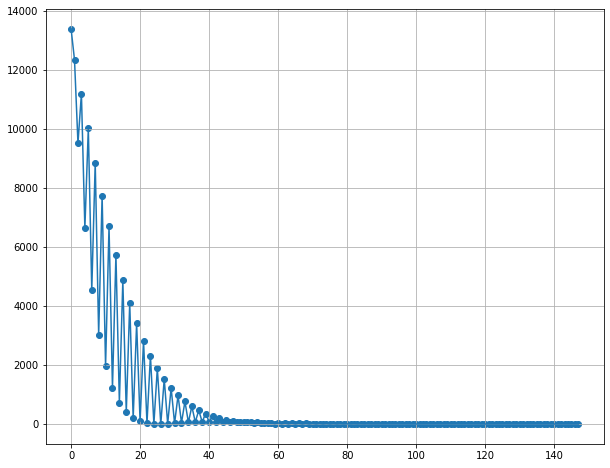

In [19]:
opt.loss_vs_epochs()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
class SGD_with_NAG:

    def __init__(self,data,target_label,function,first_derivative,batch_size,
    learning_rate = 0.0005,gamma = 0.9,max_iterations = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.function = function
        self.first_derivative = first_derivative
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.gamma = gamma
        self.costs = []
    def Init_SGD(self,data,target_label):

        m = self.data.shape[0]
        n = self.data.shape[1] + 1
        connected_array = np.concatenate((np.ones((m,1)),self.data,self.target_label), axis = 1)
        np.random.shuffle(connected_array)
        data = connected_array[:, :-1]
        target_label = connected_array[:, [-1]]
        return data,target_label,m,n
    
    def optimize(self):

        self.data,self.target_label,m,n = self.Init_SGD(self.data,self.target_label)
        c = ceil(m / self.batch_size)
        theta = np.zeros((n,1))
        v = np.zeros((n,1))
        for i in range(self.max_iterations):
            for j in range(0,m,self.batch_size):
                theta_temp = theta - self.gamma * v
                predicted_label = self.data[j:j+self.batch_size]@theta_temp
                predicted_label = predicted_label.T
                cost,error_vector = self.function(self.target_label, predicted_label,m,self.batch_size,j)
                self.costs.append(cost)
                D_theta_temp = self.first_derivative(error_vector,self.data,m,self.batch_size,j)
                theta =  theta - (self.learning_rate*D_theta_temp)
                v = self.gamma * v + (self.learning_rate*D_theta_temp)
            if(np.linalg.norm(D_theta_temp,2) < self.stop_criteria):break
            if(i > 0):
                if (abs(self.costs[i * c] - self.costs[(i-1) * c]) < self.convergance_criteria):break
        return theta
    
    def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)


class Linear_Regression:

    def cost(target_label,predicted_label,m,batch_size,batch_number):
        error_vector = predicted_label.T - target_label[batch_number:batch_number+batch_size]
        cost = (np.linalg.norm(error_vector) ** 2) / (batch_size*2)
        return cost,error_vector
    def gradient_1(error_vector,data,m,batch_size,batch_number):
        D_theta = (error_vector.T@data[batch_number:batch_number+batch_size]) / batch_size
        return D_theta.T


In [44]:
opt = SGD_with_NAG(X,y,Linear_Regression.cost,Linear_Regression.gradient_1,X.shape[0],0.00001,0.9)
theta = opt.optimize()
r2_score(y,data@theta)

0.97966557827931

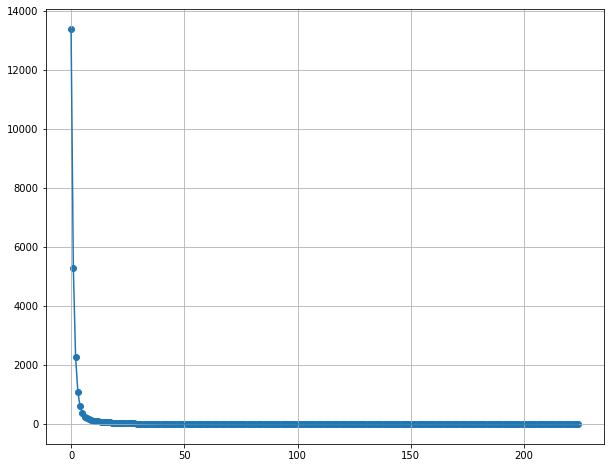

In [45]:
opt.loss_vs_epochs()

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
class SGD_with_AdaGrad:

    def __init__(self,data,target_label,function,first_derivative,batch_size,
    learning_rate = 0.0005,epsilon = 1e-8,max_iterations = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.function = function
        self.first_derivative = first_derivative
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.epsilon = epsilon
        self.costs = []
    def Init_SGD(self,data,target_label):

        m = self.data.shape[0]
        n = self.data.shape[1] + 1
        connected_array = np.concatenate((np.ones((m,1)),self.data,self.target_label), axis = 1)
        np.random.shuffle(connected_array)
        data = connected_array[:, :-1]
        target_label = connected_array[:, [-1]]
        return data,target_label,m,n
    
    def optimize(self):

        self.data,self.target_label,m,n = self.Init_SGD(self.data,self.target_label)
        c = ceil(m / self.batch_size)
        theta = np.zeros((n,1))
        v = np.zeros((n,1))
        for i in range(self.max_iterations):
            for j in range(0,m,self.batch_size):
                predicted_label = self.data[j:j+self.batch_size]@theta
                predicted_label = predicted_label.T
                cost,error_vector = self.function(self.target_label, predicted_label,m,self.batch_size,j)
                self.costs.append(cost)
                D_theta = self.first_derivative(error_vector,self.data,m,self.batch_size,j)
                v = v + D_theta ** 2
                theta = theta - ((self.learning_rate / (np.sqrt(v) + self.epsilon)) * D_theta)
            if(np.linalg.norm(D_theta,2) < self.stop_criteria):break
            if(i > 0):
                if (abs(self.costs[i * c] - self.costs[(i-1) * c]) < self.convergance_criteria):break
        return theta
    
    def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)


class Linear_Regression:

    def cost(target_label,predicted_label,m,batch_size,batch_number):
        error_vector = predicted_label.T - target_label[batch_number:batch_number+batch_size]
        cost = (np.linalg.norm(error_vector) ** 2) / (batch_size*2)
        return cost,error_vector
    def gradient_1(error_vector,data,m,batch_size,batch_number):
        D_theta = (error_vector.T@data[batch_number:batch_number+batch_size]) / batch_size
        return D_theta.T



In [54]:
opt = SGD_with_AdaGrad(X,y,Linear_Regression.cost,Linear_Regression.gradient_1,X.shape[0],0.05,1e-10)
theta = opt.optimize()
r2_score(y,data@theta)

0.9780071656748724

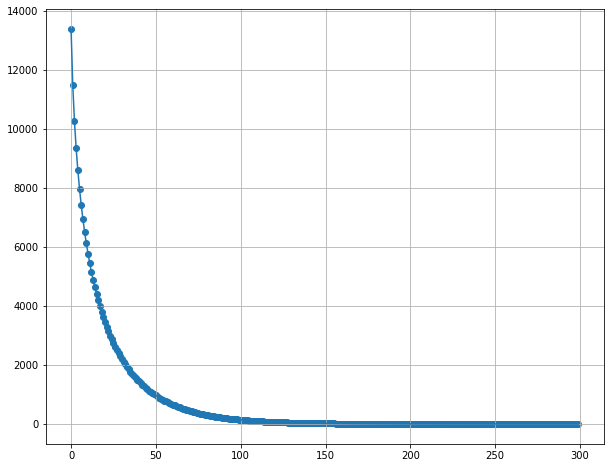

In [55]:
opt.loss_vs_epochs()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
class SGD_with_RMSProb:

    def __init__(self,data,target_label,function,first_derivative,batch_size,
    learning_rate = 0.0005,beta = 0.9,epsilon = 1e-8,max_iterations = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.function = function
        self.first_derivative = first_derivative
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.epsilon = epsilon
        self.beta = beta
        self.costs = []
    def Init_SGD(self,data,target_label):

        m = self.data.shape[0]
        n = self.data.shape[1] + 1
        connected_array = np.concatenate((np.ones((m,1)),self.data,self.target_label), axis = 1)
        np.random.shuffle(connected_array)
        data = connected_array[:, :-1]
        target_label = connected_array[:, [-1]]
        return data,target_label,m,n
    
    def optimize(self):

        self.data,self.target_label,m,n = self.Init_SGD(self.data,self.target_label)
        c = ceil(m / self.batch_size)
        theta = np.zeros((n,1))
        v = np.zeros((n,1))
        for i in range(self.max_iterations):
            for j in range(0,m,self.batch_size):
                predicted_label = self.data[j:j+self.batch_size]@theta
                predicted_label = predicted_label.T
                cost,error_vector = self.function(self.target_label, predicted_label,m,self.batch_size,j)
                self.costs.append(cost)
                D_theta = self.first_derivative(error_vector,self.data,m,self.batch_size,j)
                v = self.beta * v + (1-self.beta)*D_theta ** 2
                theta = theta - ((self.learning_rate / (np.sqrt(v) + self.epsilon)) * D_theta)
            if(np.linalg.norm(D_theta,2) < self.stop_criteria):break
            if(i > 0):
                if (abs(self.costs[i * c] - self.costs[(i-1) * c]) < self.convergance_criteria):break
        return theta
    
    def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)


class Linear_Regression:

    def cost(target_label,predicted_label,m,batch_size,batch_number):
        error_vector = predicted_label.T - target_label[batch_number:batch_number+batch_size]
        cost = (np.linalg.norm(error_vector) ** 2) / (batch_size*2)
        return cost,error_vector
    def gradient_1(error_vector,data,m,batch_size,batch_number):
        D_theta = (error_vector.T@data[batch_number:batch_number+batch_size]) / batch_size
        return D_theta.T

In [63]:
opt = SGD_with_RMSProb(X,y,Linear_Regression.cost,Linear_Regression.gradient_1,X.shape[0],0.005,0.9)
theta = opt.optimize()
r2_score(y,data@theta)

0.982004807647148

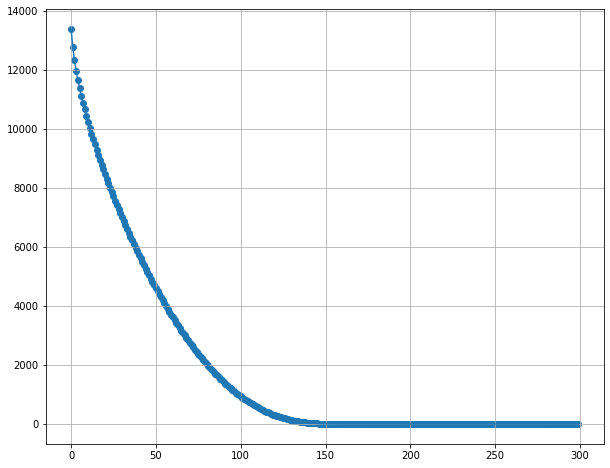

In [64]:
opt.loss_vs_epochs()

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
class SGD_with_Adam:

    def __init__(self,data,target_label,function,first_derivative,batch_size,
    learning_rate = 0.0005,beta1 = 0.9,beta2 = 0.1,epsilon = 1e-8,max_iterations = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.function = function
        self.first_derivative = first_derivative
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        self.costs = []
    def Init_SGD(self,data,target_label):

        m = self.data.shape[0]
        n = self.data.shape[1] + 1
        connected_array = np.concatenate((np.ones((m,1)),self.data,self.target_label), axis = 1)
        np.random.shuffle(connected_array)
        data = connected_array[:, :-1]
        target_label = connected_array[:, [-1]]
        return data,target_label,int(m),int(n)
    
    def optimize(self):

        self.data,self.target_label,m,n = self.Init_SGD(self.data,self.target_label)
        c = ceil(m / self.batch_size)
        theta = np.zeros((n,1))
        v = np.zeros((n,1))
        mt = np.zeros((n,1))
        for i in range(self.max_iterations):
            for j in range(0,m,self.batch_size):
                predicted_label = self.data[j:j+self.batch_size]@theta
                predicted_label = predicted_label.T
                cost,error_vector = self.function(self.target_label, predicted_label,m,self.batch_size,j)
                self.costs.append(cost)
                D_theta = self.first_derivative(error_vector,self.data,m,self.batch_size,j)
                mt = self.beta1 * mt + ((1 - self.beta1) * D_theta)
                v = self.beta2 * v + (1 - self.beta2) * D_theta ** 2
                mt = mt / (1-(self.beta1**(i+1)))
                v = v / (1-(self.beta2**(i+1)))
                theta = theta - ((self.learning_rate / (np.sqrt(v) + self.epsilon)) * mt)
            if(np.linalg.norm(D_theta,2) < self.stop_criteria):break
            if(i > 0):
                if (abs(self.costs[i * c] - self.costs[(i-1) * c]) < self.convergance_criteria):break
        return theta
    
    def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)


class Linear_Regression:

    def cost(target_label,predicted_label,m,batch_size,batch_number):
        error_vector = predicted_label.T - target_label[batch_number:batch_number+batch_size]
        cost = (np.linalg.norm(error_vector) ** 2) / (batch_size*2)
        return cost,error_vector
    def gradient_1(error_vector,data,m,batch_size,batch_number):
        D_theta = (error_vector.T@data[batch_number:batch_number+batch_size]) / batch_size
        return D_theta.T

In [78]:
opt = SGD_with_Adam(X,y,Linear_Regression.cost,Linear_Regression.gradient_1,X.shape[0],0.01,0.6,0.9)
theta = opt.optimize()
r2_score(y,data@theta)

0.9782874196387509

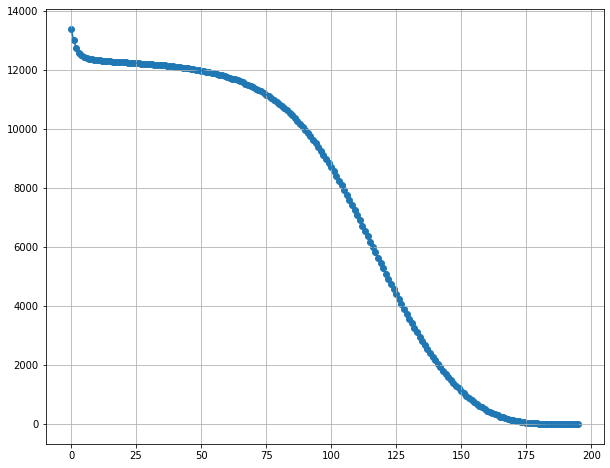

In [79]:
opt.loss_vs_epochs()

In [80]:
import numpy as np
import matplotlib.pyplot as plt
class Newton_GD:
  def __init__(self,data,target_label,first_derivative,second_derivative,
    learning_rate = 1,epochs = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.first_derivative = first_derivative
        self.second_derivative = second_derivative
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.costs = []
  def optimize(self):
    m = self.data.shape[0]
    n = self.data.shape[1] + 1
    self.data = np.concatenate((np.ones((m,1)),self.data), axis = 1)
    grad = np.zeros((n,1))
    theta = np.zeros((n,1))
    for i in range(self.epochs):
      theta = theta - (self.learning_rate * grad.T @ np.linalg.inv(self.second_derivative(self.data))).T
      grad ,cost = self.first_derivative(self.data,self.target_label,theta)
      self.costs.append(cost)
      if(np.linalg.norm(grad) <= self.stop_criteria):return i,theta,grad
      if(i > 0):
        if (abs(self.costs[i] - self.costs[(i-1)]) < self.convergance_criteria):return i,theta,grad
    return self.epochs,grad,theta
  def loss_vs_epochs(self):
        plt.figure(figsize=(10,8))
        plt.grid()
        plt.plot(range(len(self.costs)),self.costs)
        plt.scatter(range(len(self.costs)),self.costs)

class Linear_Regression:

    def cost(target_label,predicted_label,m):
        error_vector = predicted_label.T - target_label
        cost = (np.linalg.norm(error_vector) ** 2) / (m*2)
        return cost,error_vector
    def gradient_1(data,target_label,theta):
        m = data.shape[0]
        predicted_label = data@theta
  #predicted_label = predicted_label.T
        error_vector = predicted_label - target_label
        cost = (np.linalg.norm(error_vector) ** 2) / (m*2)
        D_theta = (error_vector.T@data) / m
        return D_theta.T,cost
    def gradient_2(data):
        m = data.shape[0]
        D_theta_2 = data.T@data / m
        return D_theta_2


In [84]:
opt = Newton_GD(X,y,Linear_Regression.gradient_1,Linear_Regression.gradient_2,)
i,theta,grad = opt.optimize()
r2_score(y,data@theta)

0.9896615789448399

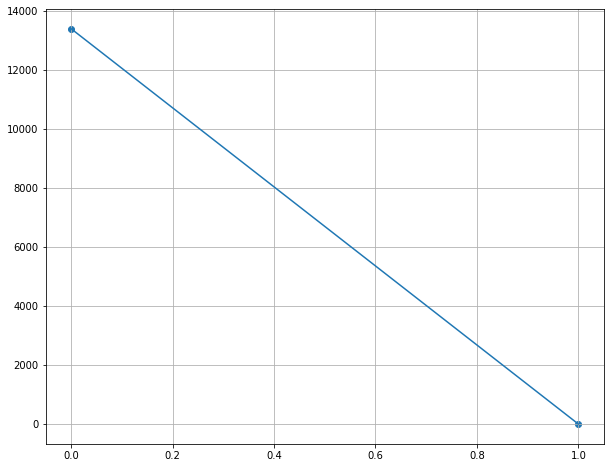

In [85]:
opt.loss_vs_epochs()

In [87]:
import numpy as np
import matplotlib.pyplot as plt
class BFGS:
  
  def __init__(self,data,target_label,first_derivative,
    learning_rate = 1,epochs = 300, 
    stop_criteria = 0.001,convergance_criteria = 0.001) -> None:

        self.data = data 
        self.target_label = target_label
        self.first_derivative = first_derivative
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.stop_criteria = stop_criteria
        self.convergance_criteria = convergance_criteria
        self.costs = []
  
  def optimize(self):
    m = self.data.shape[0]
    n = self.data.shape[1] + 1
    self.data = np.concatenate((np.ones((m,1)),self.data), axis = 1)
    current_theta = np.zeros((n,1))
    previous_theta = 0.1 * np.ones((n,1))
    current_grad,_ = self.first_derivative(self.data,self.target_label,current_theta)
    previous_grad,__ = self.first_derivative(self.data,self.target_label,previous_theta)
    i = 0
    B_inv = np.eye(n)

    while(i < self.epochs and np.linalg.norm(current_grad) >= self.stop_criteria and abs(_ - __) >= self.convergance_criteria):
        self.costs.append(_)
        delta_theta = current_theta - previous_theta
        delta_grad = current_grad - previous_grad
        delta_grad = delta_grad.T
        B_inv = (np.eye(n) - (delta_theta@delta_grad)/(delta_grad@delta_theta))@B_inv@((np.eye(n) - (delta_grad.T@delta_theta.T)/(delta_grad@delta_theta))) +((delta_theta@delta_theta.T)/(delta_grad@delta_theta))
        previous_theta = current_theta
        current_theta = current_theta - self.learning_rate*(B_inv@current_grad)
        current_grad,_ = self.first_derivative(self.data,self.target_label,current_theta)
        previous_grad,__ = self.first_derivative(self.data,self.target_label,previous_theta)
        i += 1
    return i,current_theta,current_grad
  def loss_vs_epochs(self):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.plot(range(len(self.costs)),self.costs)
    plt.scatter(range(len(self.costs)),self.costs)

class Linear_Regression:

    def cost(target_label,predicted_label,m):
        error_vector = predicted_label.T - target_label
        cost = (np.linalg.norm(error_vector) ** 2) / (m*2)
        return cost,error_vector
    def gradient_1(data,target_label,theta):
        m = data.shape[0]
        predicted_label = data@theta
  #predicted_label = predicted_label.T
        error_vector = predicted_label - target_label
        cost = (np.linalg.norm(error_vector) ** 2) / (m*2)
        D_theta = (error_vector.T@data) / m
        return D_theta.T,cost
    def gradient_2(data):
        m = data.shape[0]
        D_theta_2 = data.T@data / m
        return D_theta_2



In [88]:
opt = BFGS(X,y,Linear_Regression.gradient_1,)
i,theta,grad = opt.optimize()
r2_score(y,data@theta)

0.9896615774278573

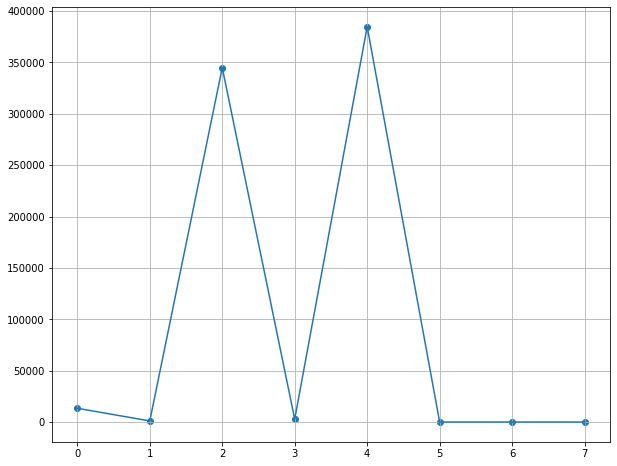

In [89]:
opt.loss_vs_epochs()